Install Dependicies and libraries

In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install pandas
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Import important Libraries

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf 



In [5]:
import os

Import dataset

In [6]:
os.environ['KAGGLE_USERNAME'] = 'ZUNAIRA_NUREEN'
os.environ['KAGGLE_KEY'] = '55551cb21e4f2cbbee4cd1c6008733ff'

In [7]:
!pip install kaggle

!kaggle datasets download julian3833/jigsaw-toxic-comment-classification-challenge

Defaulting to user installation because normal site-packages is not writeable
Dataset URL: https://www.kaggle.com/datasets/julian3833/jigsaw-toxic-comment-classification-challenge
License(s): CC0-1.0
jigsaw-toxic-comment-classification-challenge.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!kaggle datasets download julian3833/jigsaw-toxic-comment-classification-challenge

Dataset URL: https://www.kaggle.com/datasets/julian3833/jigsaw-toxic-comment-classification-challenge
License(s): CC0-1.0
jigsaw-toxic-comment-classification-challenge.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
import zipfile
import os

# Define the path to the zip file and the output directory
zip_path = './jigsaw-toxic-comment-classification-challenge.zip'
extract_dir = './dataset'  # Specify your extraction folder

# Create the extraction directory if it doesn’t exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Dataset unzipped successfully!")


Dataset unzipped successfully!


In [10]:
# Define the file paths for the training and test datasets
train_path = r'C:\Users\Ihtsham Mehmood\Downloads\Documents\dataset\train.csv'  # Path to the training dataset
test_path=r'C:\Users\Ihtsham Mehmood\Downloads\Documents\dataset\test.csv'      # Path to the testing dataset

# Read the training and test CSV files into pandas DataFrames
train_df = pd.read_csv(train_path)    # Load the training data
test_df = pd.read_csv(test_path)       # Load the test data


# Concatenate (combine) the training and test DataFrames vertically, ignoring index to create a continuous index
df= pd.concat([train_df,test_df],ignore_index=True)

# Output the shape of the combined DataFrame to check the number of rows and columns
print(df.shape)

# Display the first few rows of the combined DataFrame to get a glimpse of the data
df.head()

(312735, 8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0.0,0.0,0.0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0.0,0.0,0.0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0.0,0.0,0.0,0.0,0.0,0.0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0.0,0.0,0.0,0.0,0.0,0.0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
312730,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",NaN,NaN,NaN,NaN,NaN,NaN
312731,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,NaN,NaN,NaN,NaN,NaN,NaN
312732,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",NaN,NaN,NaN,NaN,NaN,NaN
312733,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",NaN,NaN,NaN,NaN,NaN,NaN
312734,ffffce3fb183ee80,""" \n :::Stop already. Your bullshit is not wel...",NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Accesses the value in the first row and second column (assuming 'comment_text' is column 1)
df.iloc[0]['comment_text']

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [13]:
df[df.columns[2:]].iloc[3]

toxic            0.0
severe_toxic     0.0
obscene          0.0
threat           0.0
insult           0.0
identity_hate    0.0
Name: 3, dtype: float64

In [14]:
# Filter the DataFrame to include only rows where the 'toxic' column has a value of 1 (toxic comments)
df[df['toxic']==1].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1.0,1.0,1.0,0.0,1.0,0.0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1.0,0.0,0.0,0.0,0.0,0.0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1.0,0.0,0.0,0.0,0.0,0.0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1.0,0.0,1.0,0.0,1.0,1.0
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1.0,0.0,1.0,0.0,1.0,0.0


PreProcessing

In [15]:
# Import the TextVectorization layer from TensorFlow's Keras API
# TextVectorization is used to preprocess text by converting raw text into sequences of tokens or embedding representations.
# This layer is typically used in Natural Language Processing (NLP) tasks to standardize, tokenize, and vectorize text input.
from tensorflow.keras.layers import TextVectorization

In [16]:
df = df.dropna() # drop all nan values

In [17]:
df.shape # check the dataset, number of rows and columns

(159571, 8)

In [18]:
# Split the dataset into x and y for preprocessing step
x=df['comment_text']
y=df[df.columns[2:]].values

In [19]:
y

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [20]:
Max_Features = 200000 # number of words in the vocab

In [21]:
# Create an instance of the TextVectorization layer for preprocessing text data
# This layer converts raw text into sequences of integers, which can be fed into machine learning models.
vectorizer = TextVectorization(
    max_tokens=Max_Features,          # Maximum number of unique tokens to keep in the vocabulary
                                       # Tokens beyond this limit will be ignored. This helps control the size of the vocabulary
    output_sequence_length=1800,      # Length of the output sequences
                                       # Any input sequences longer than this will be truncated,
                                       # and shorter sequences will be padded to this length.
    output_mode='int'                 # Output mode specifies the format of the vectorized output
                                       # 'int' means the output will be a sequence of integers representing token indices
)

In [22]:
# Use the adapt() method of the vectorizer to learn the vocabulary from the text data
# This prepares the TextVectorization layer to convert raw text into numbers.
vectorizer.adapt(x.values)  # x.values contains the raw text data as a NumPy array.


In [23]:
type(x.values)

numpy.ndarray

In [24]:
vectorized_text = vectorizer(x.values) #transform raw text into numbers

In [25]:
len(x)

159571

In [26]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [27]:
# MCSHBAP - map, cache, shuffle, batch, prefetch from tensor_slices, list_file

# Create a TensorFlow dataset from the vectorized text data (inputs) and their corresponding labels (y)
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))

# Cache the dataset in memory to speed up data loading in future epochs
dataset = dataset.cache()

# Shuffle the dataset randomly to ensure that the model doesn't learn any unintended patterns
dataset = dataset.shuffle(160000)  # 160000 is the buffer size for shuffling

# Group the data into batches of 16 samples each for more efficient training
dataset = dataset.batch(16)

# Prefetch data to improve performance by loading the next batch while the current batch is being processed
dataset = dataset.prefetch(8)  # 8 batches will be prefetched


In [28]:
# Convert the dataset into an iterator that yields NumPy arrays
# Retrieve the first batch of data from the iterator
batch_x, batch_y = dataset.as_numpy_iterator().next()

In [29]:
batch_x.shape

(16, 1800)

In [30]:
int(len(dataset))

9974

In [31]:
# Split the dataset into training, validation, and test sets

# Take the first 70% of the dataset for training
train = dataset.take(int(len(dataset) * 0.7))

# Skip the first 70% of the dataset and take the next 20% for validation
val = dataset.skip(int(len(dataset) * 0.7)).take(int(len(dataset) * 0.2))

# Skip the first 90% of the dataset and take the remaining 10% for testing
test = dataset.skip(int(len(dataset) * 0.9)).take(int(len(dataset) * 0.1))


In [32]:
len(train),len(val),len(test)

(6981, 1994, 997)

In [33]:
train_generator = train.as_numpy_iterator()

In [34]:
train_generator.next()

(array([[2211, 9478,  490, ...,    0,    0,    0],
        [   8,   44,   17, ...,    0,    0,    0],
        [   8,   74, 3888, ...,    0,    0,    0],
        ...,
        [   5,  934,    4, ...,    0,    0,    0],
        [ 679,  266,   12, ...,    0,    0,    0],
        [ 179,    2,  648, ...,    0,    0,    0]]),
 array([[0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]))

Create Sequential Model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [36]:
# Initialize a Sequential model (a linear stack of layers)
model = Sequential()

# Add an Embedding layer to learn vector representations of words (used in NLP)
# Max_Features+1 is the vocabulary size, 32 is the output dimension of each word vector
model.add(Embedding(Max_Features+1, 32))

# Add a Bidirectional LSTM layer for sequential processing (captures patterns in text from both directions)
# LSTM has 32 units and uses 'tanh' as the activation function
model.add(Bidirectional(LSTM(32, activation='tanh')))

# Add a Dense layer with 128 units and 'relu' activation for further learning
# This layer helps the model capture more complex relationships in the data
model.add(Dense(128, activation='relu'))

# Add another Dense layer with 256 units and 'relu' activation
# The larger number of units allows this layer to learn a more detailed representation
model.add(Dense(256, activation='relu'))

# Add another Dense layer with 128 units and 'relu' activation
# Adds depth to the model, enabling it to capture more complex patterns
model.add(Dense(128, activation='relu'))

# Add an output Dense layer with 6 units and 'sigmoid' activation
# 6 units correspond to the number of output classes; sigmoid outputs probabilities for each class
model.add(Dense(6, activation='sigmoid'))

model.build(input_shape=(None,1800))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 1800, 32)       │     6,400,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,491,686 (24.76 MB)

 Trainable params: 6,491,686 (24.76 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(loss='BinaryCrossentropy', optimizer = 'Adam')

In [38]:
history = model.fit(train, epochs=1, validation_data=val)

6981/6981 ━━━━━━━━━━━━━━━━━━━━ 6182s 884ms/step - loss: 0.0825 - val_loss: 0.0464


In [39]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   ------ --------------------------------- 1.3/7.8 MB 4.2 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/7.8 MB 4.0 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/7.8 MB 4.0 MB/s eta 0:00:02
   ------------- -------------------------- 2.6/7.8 MB 3.3 MB/s eta 0:00:02
   ----------------- ---------------------- 3.4/7.8 MB 3.0 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/7.8 MB 3.4 MB/s eta 0:00:02
   ------------------------- -------------- 5.0/7.8 MB 3.3 MB/s eta 0:00:01
   ------------------------- -------------- 5.0/7.8 MB 3.3 MB/s eta 0:00:01
   ----------------------------- ---------- 5.8/7.8 MB 3.1 MB/s eta 0:00:01
   -------------------------------- ------- 6.3/7.8 MB 2.9 MB/s eta 0:00:01
   ---------------------

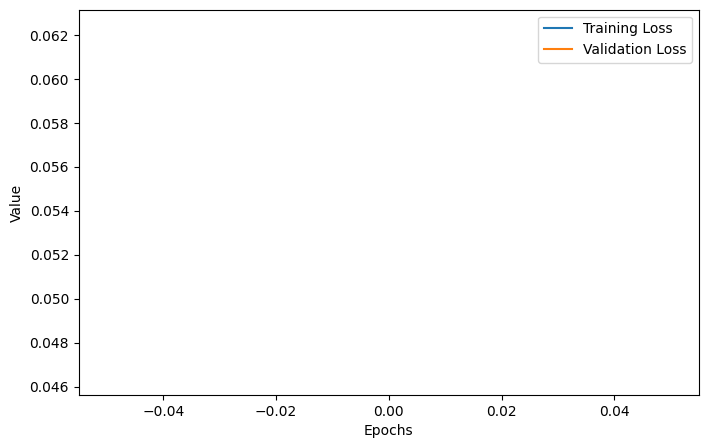

In [40]:
import matplotlib.pyplot as plt

# Assuming 'history' is your training history object from model.fit()
plt.figure(figsize=(8, 5))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Plot training and validation accuracy if available
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()


Make Predictions

In [55]:
# Convert the input text into a numerical vector using the vectorizer
input_text = vectorizer('You freaking suck! I am going to hit you.')

# Expand dimensions of the input to fit the model's expected input shape
# np.expand_dims adds an extra dimension, turning the input into a 2D array
# (required for batch predictions where the first dimension is the batch size)
input_text_expanded = np.expand_dims(input_text, 0)

# Use the trained model to make a prediction on the processed input text
res = model.predict(input_text_expanded)

# Print the prediction result, which might represent a classification score or probability
print(res)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
[[0.9713162  0.18705663 0.7806021  0.04928617 0.6621634  0.09810686]]


In [56]:
Batch_x,Batch_y=test.as_numpy_iterator().next()
(model.predict(Batch_x)>0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [1, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [57]:
Batch_y

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.]])

Evaluate Model

In [60]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [61]:
pre = Precision()
Re = Recall()
acc=CategoricalAccuracy()

In [63]:
# Iterate through each batch in the test dataset using an iterator
for batch in test.as_numpy_iterator():
    # Unpack the features (X) and labels (Y) from the batch
    X_true, Y_true = batch
    
    # Use the trained model to make predictions on the input features X_true
    y_predict = model.predict(X_true)

    # Flatten the true labels and predictions to 1D arrays for consistency
    Y_true = Y_true.flatten()
    y_predict = y_predict.flatten()

    # Update the precision metric state based on true and predicted values
    pre.update_state(Y_true, y_predict)
    
    # Update the recall metric state based on true and predicted values
    Re.update_state(Y_true, y_predict)
    
    # Update the accuracy metric state based on true and predicted values
    acc.update_state(Y_true, y_predict)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [70]:
# Print the precision, recall, and categorical accuracy metrics
# The .result() method retrieves the current value of each metric after updates
# .numpy() converts the result from a TensorFlow tensor to a numpy value for easier printing
print(f'Precision: {pre.result().numpy()}, Recall: {Re.result().numpy()}, Categorical Accuracy: {acc.result().numpy()}')


Precision: 0.8633663654327393, Recall: 0.6240687966346741, Categorical Accuracy: 0.48946839570999146


Test and Gradio

In [71]:
!pip install gradio jinja2

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/56.7 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.7 MB 4.2 MB/s eta 0:00:14
    --------------------------------------- 1.3/56.7 MB 3.9 MB/s eta 0:00:15
   - -------------------------------------- 1.8/56.7 MB 4.4 MB/s eta 0:00:13
   - -------------------------------------- 2.6/56.7 MB 3.5 MB/s eta 0:00:16
   -- ------------------------------------- 2.9/56.7 MB 3.1 MB/s eta 0:00:18
   -- ------------------------------------- 3.4/56.7 MB 3.1 MB/s eta 0:00:18
   -- ------------------------------------- 4.2/56.7 MB 3.3 MB/s eta 0:00:17
   --- ------------------------------------ 4.7/56.7 MB 3.1 MB/s eta 0:00:17
   --- ------------------------------------ 5.2/56.7 MB 3.2 MB/s eta 0:00:17
   --- ------------------------------------ 5.5/56.7 MB 2.9 MB/s eta 0:00:18
   ---- ----------------------------------- 6.6/56.7 MB 3.1 MB/s eta 0:00:17
   --

In [72]:
import gradio as gr

C:\Users\Ihtsham Mehmood\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [73]:
model.save('toxicity.h5')

In [74]:
model = tf.keras.models.load_model('toxicity.h5')

In [79]:
input_str = vectorizer('hey i freaken hate you! I am coming for you. I am going to hurt you')

In [80]:
res = model.predict(np.expand_dims(input_str,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


In [81]:
res

array([[0.51868284, 0.00266144, 0.11351828, 0.00585889, 0.17799382,
        0.00955491]], dtype=float32)

In [82]:
def score_comment(comment):
    # Convert the input comment into a numerical vector using the vectorizer
    vectorized_comment = vectorizer([comment])

    # Use the trained model to predict the scores for each category (e.g., toxicity, insult)
    results = model.predict(vectorized_comment)

    # Initialize an empty string to store the formatted results
    text = ''
    
    # Iterate over each column, starting from the 3rd column to the last column
    # (based on df.columns[2:-1]), which are assumed to represent different categories
    for idx, col in enumerate(df.columns[2:]):
        # Append the category name and whether the predicted score is greater than 0.5 (True or False)
        text += '{}: {}\n'.format(col, results[0][idx] > 0.5)

    # Return the final text containing all the category results for the input comment
    return text


In [84]:
import gradio as gr

# Create a Gradio interface to interact with the `score_comment` function
interface = gr.Interface(
    fn=score_comment,  # Specify the function to use for processing input (score_comment)

    # Set up the input as a text box with 2 lines, where users can type a comment to score
    inputs=gr.Textbox(lines=2, placeholder='Comment to Score'),

    # Define the output type as plain text, displaying the scoring results from score_comment
    outputs='text'
)


In [85]:
interface.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://2f089635098b6b0d7d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
